In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
#from scipy.optimize import curve_fit
import scipy

In [2]:
def PlotHistogramIntervals(df):
    #Plots histogram of intevals between counts
    df['sum'] = df.iloc[:,1:].sum(axis = 1)
    diff = df[df['sum'] > 0].iloc[:,0].diff().dropna()
    fig, ax = plt.subplots()
    ax.hist( diff, bins = 100, edgecolor = 'black' )
    ax.set_title('Time Intervals between signals')
    ax.set_ylabel('counts')
    ax.set_xlabel('time interval')
    plt.show()

In [19]:
def PlotSum(df):
        #Plots sum of ADC counts for each sensor in format ' SUM_{i}'
    fig, ax = plt.subplots()
    sum = []
    for i in range(20):
        sum.append(df[f' SUM_{i}'].sum())
    ax.scatter(range(20), sum)
    ax.set_xlabel('PD index')
    ax.set_ylabel('Sum of ADC counts')
    ax.set_xticks(range(20))
    ax.set_title('Sum of ADC conts per PD')
    plt.show()
    #fig.savefig('./ADC conts per PD')
    #print(df.sum())

In [23]:
def PlotSum2(df):
    #Plots sum of ADC counts for each sensor in format 'sum_{i}'
    fig, ax = plt.subplots()
    sum = []
    for i in range(20):
        sum.append(df[f'sum_{i}'].sum())
    ax.scatter(range(20), sum)
    ax.set_xlabel('PD index')
    ax.set_ylabel('Sum of ADC counts')
    ax.set_xticks(range(20))
    ax.set_title('Sum of ADC conts per PD')
    ax.grid()
    plt.show()
    #fig.savefig('./ADC conts per PD')
    #print(df.sum())

In [5]:
def PlotTemp(df):
    #Plots temperature vs timestamp
    fig, ax = plt.subplots()
    ax.plot(df['timestamp'],df['pt100'])
    ax.set_xlabel('timestamp')
    ax.set_ylabel('pt100')
    ax.set_title('Temperature over time')
    plt.show()

In [6]:
def PlotVolt(df):
    #Plots volts vs timestamp
    fig, ax = plt.subplots()
    ax.scatter(df['timestamp'],df['volt'],s=2, alpha=0.5)
    ax.set_xlabel('timestamp')
    ax.set_ylabel('volt')
    ax.set_title('Voltage over time')
    plt.show()

In [26]:
def PlotADCvsTime(df):
    #Plots sum over 50 frames vs timestamps
    sums = [[] for i in range(20) ]
    with plt.rc_context():
        plt.rcParams.update({'xtick.labelsize':4})
        plt.rcParams.update({'ytick.labelsize':4})
        plt.rcParams.update({'lines.linewidth':0.5})
        plt.rcParams.update({'font.size': 4})

        fig, ax = plt.subplots(4,5)
        for i in range(20):
            for j in range(int(df.shape[0]/50)):
                sums[i].append(df.iloc[50*j:50*(j+1)].sum().loc[f'sum_{i}'])

            ax[i//5,i%5].plot(df['timestamp'][[50*k for k in range(int(df.shape[0]/50))]], sums[i])
            ax[i//5,i%5].set_xlabel('timestamp')
            ax[i//5,i%5].set_ylabel('Sum of ADC counts over 50 min')
            ax[i//5,i%5].set_title(f'Sensor {i}')
            ax[i//5,i%5].grid()
        plt.tight_layout()
        plt.show()
        #fig.savefig('./ADC counts over time', dpi=1000)

In [29]:
def PlotHistogram(df):
    #df['mean'] = df['voltage']/df['samples']
    plt.hist(df['volt'], bins=30)


In [31]:
def PlotHist(df): 
    #Plots histograms
    def gaus(x, amp,cen,sigma):
        return amp*(1/(sigma*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen)/sigma)**2))) 
    with plt.rc_context():
        plt.rcParams.update({'xtick.labelsize':3})
        plt.rcParams.update({'ytick.labelsize':3})
        plt.rcParams.update({'lines.linewidth':1})
        plt.rcParams.update({'font.size': 3})

        fig, ax = plt.subplots(4,5)
        for i in range(20):
            df['mean'] = df[f'sum_{i}']/df['samples']
            n, bins, patches = ax[i//5,i%5].hist(df['mean'], bins=100)
            bins2 = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
            x = bins2
            y = n
            mean = np.mean(df['mean'])            
            sigma = np.std(df['mean'])
            if mean > 1.e-2:
                popt,pcov = scipy.optimize.curve_fit(gaus,x,y,p0=[1,mean,sigma])
                ax[i//5,i%5].plot(x,gaus(x,*popt),label=f'Gaussian μ = {popt[1]:.3e} \n σ = {popt[2]:.3e} ')
                ax[i//5,i%5].set_xlabel(f'mean{i}')
                ax[i//5,i%5].set_ylabel('counts')
                ax[i//5,i%5].set_title(f'Sensor {i}')
                ax[i//5,i%5].legend()
        plt.tight_layout()
        plt.show()
        fig.savefig('./Histograms',dpi = 200)

In [11]:
df1 = pd.read_csv('./Darks1/sumsq.R0.csv')
#print(df1.columns.values)
df2 = pd.read_csv('./Darks1/adc1_ch7.csv')
df3 = pd.read_csv('./Darks1/adc1_ch9.csv')
df4 = pd.read_csv('./Darks2/Pedestals-20250711143315-R0.csv')
dftemp = pd.read_csv('./Darks2/Pedestals-20250711143315-temperatures.csv')
dfvolt = pd.read_csv('./Darks2/Pedestals-20250711143315-voltage.csv')

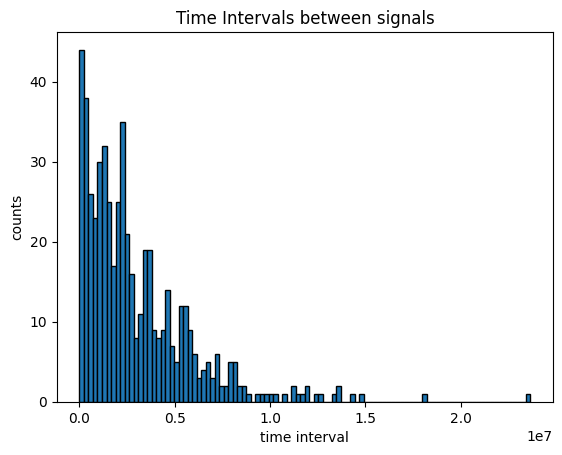

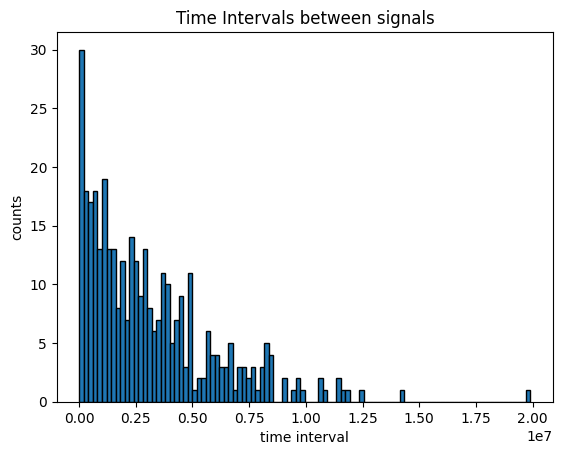

In [12]:
PlotHistogramIntervals(df2)
PlotHistogramIntervals(df3)

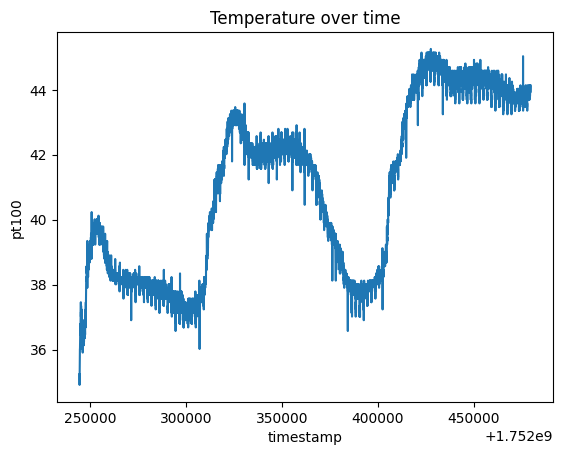

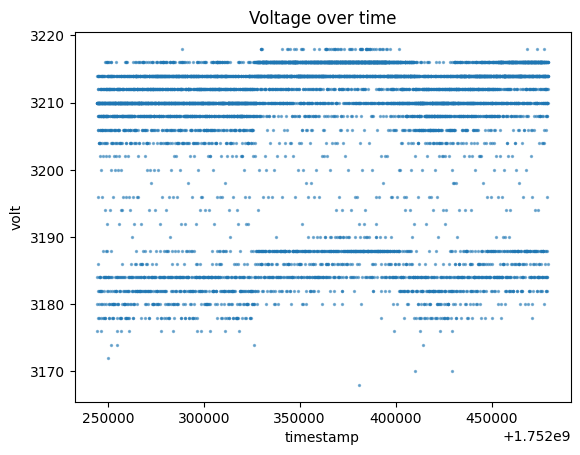

In [13]:
PlotTemp(dftemp)
PlotVolt(dfvolt)

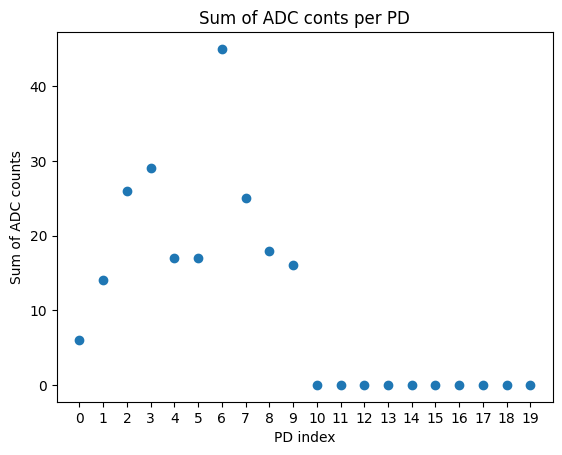

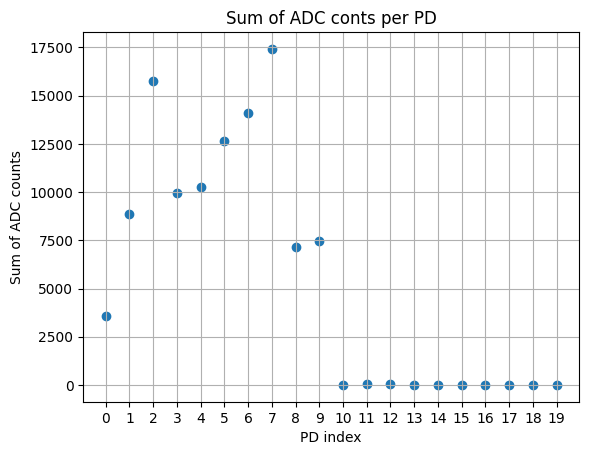

3370792692.0
sum_0      3554.0
sum_1      8870.0
sum_2     15770.0
sum_3      9943.0
sum_4     10289.0
sum_5     12644.0
sum_6     14085.0
sum_7     17424.0
sum_8      7160.0
sum_9      7487.0
sum_10       11.0
sum_11       24.0
sum_12       38.0
sum_13        2.0
sum_14        2.0
sum_15       11.0
sum_16        3.0
sum_17        0.0
sum_18        5.0
sum_19       20.0
dtype: float64


In [25]:
PlotSum(df1)
PlotSum2(df4)

print (df4.sum().iloc[1]) #total samples
#print(df4.iloc[0:10].sum())
print(df4.sum().iloc[[4*i+2 for i in range(20)]]) #Total counts per sesnor

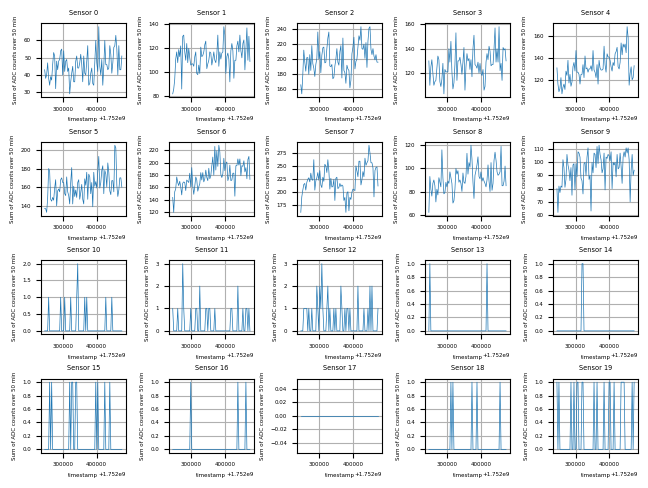

In [27]:
PlotADCvsTime(df4)

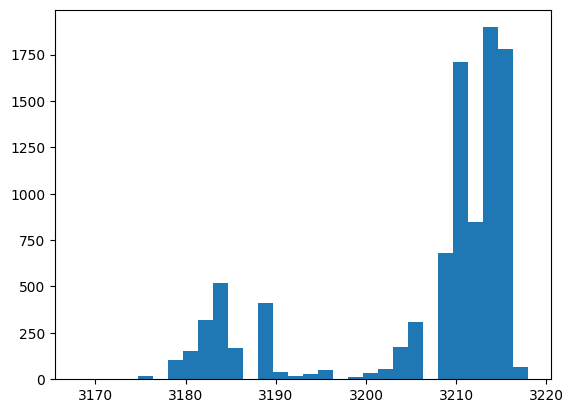

In [30]:
PlotHistogram(dfvolt)

In [32]:
df5 = pd.read_csv('./LED/Pedestals-20250715140945-R0.csv')
dflaser = pd.read_csv('./Laser/Pedestals-20250717135603-R0.csv')

C:\Users\Eloi\AppData\Local\Temp\ipykernel_15232\243944284.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = df[f'sum_{i}']/df['samples']


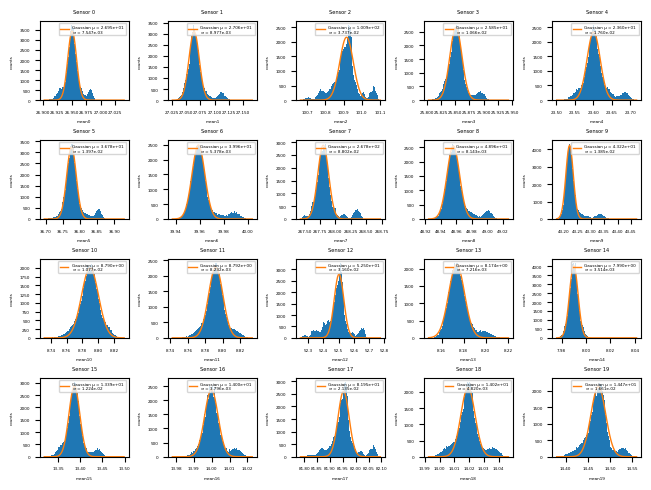

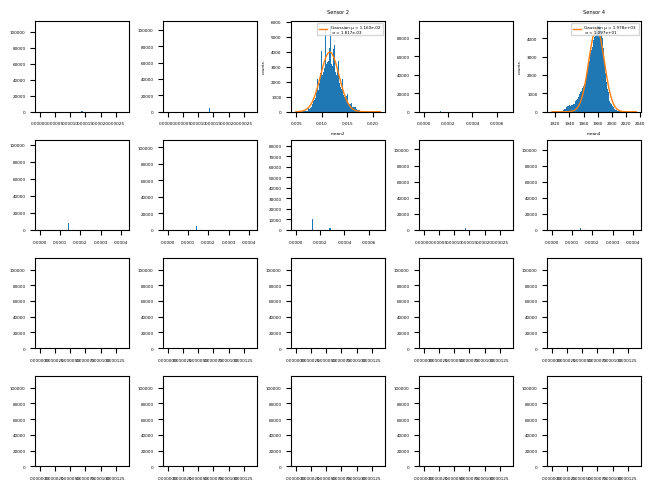

In [34]:
df6 = df5[df5['timestamp'] > df5['timestamp'].iloc[0] +14000]

PlotHist(df6)
PlotHist(dflaser)

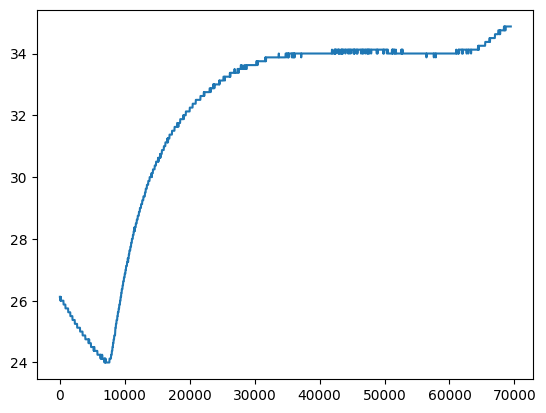

In [ ]:
dftemp2 = pd.read_csv('./Pedestals-20250715140945-temperatures.csv')
plt.plot(dftemp2['timestamp']-dftemp2['timestamp'].iloc[0],dftemp2['i2c_r'])
plt.show()